In [1]:
import os,shutil

In [2]:
import zipfile

In [3]:
zip_file_path = "/kaggle/input/dogs-vs-cats/train.zip"

In [4]:
odir = "/kaggle/working/new"

In [5]:
os.makedirs(odir, exist_ok=True)

In [6]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(odir)

In [ ]:
bdir='/kaggle/working/dogs-cats'
os.mkdir(bdir)

In [11]:
tdir=os.path.join(bdir,'train')
os.mkdir(tdir)
vdir=os.path.join(bdir,'validation')
os.mkdir(vdir)
testdir=os.path.join(bdir,'test')
os.mkdir(testdir)

In [12]:
tcd=os.path.join(tdir,'cats')
os.mkdir(tcd)
tdd=os.path.join(tdir,'dogs')
os.mkdir(tdd)

In [13]:
vcd=os.path.join(vdir,'cats')
os.mkdir(vcd)
vdd=os.path.join(vdir,'dogs')
os.mkdir(vdd)

In [14]:
testcd=os.path.join(testdir,'cats')
os.mkdir(testcd)
testdd=os.path.join(testdir,'dogs')
os.mkdir(testdd)

In [15]:
file_names = os.listdir(odir+'/train/')
file_names[0]

'dog.11153.jpg'

In [16]:
from PIL import Image

# Directory path
directory_path = odir+'/train/'

# Get list of image files in the directory
image_files = [f for f in os.listdir(directory_path) if f.endswith(('.png', '.jpg', '.jpeg', '.gif'))]

# Check if there are any image files in the directory
if len(image_files) == 0:
    print("No image files found in the directory.")
else:
    # Get dimensions of the first image file
    first_image = Image.open(os.path.join(directory_path, image_files[0]))
    first_dimensions = first_image.size

    # Check dimensions of other image files
    same_dimensions = True
    for image_file in image_files[1:]:
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        if image.size != first_dimensions:
            same_dimensions = False

    if same_dimensions:
        print("All image files have the same dimensions.")
    else:
        print("Not all image files have the same dimensions.")


Not all image files have the same dimensions.


In [17]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(odir+'/train/',fname)
    dst=os.path.join(tcd,fname)
    shutil.copyfile(src,dst)

In [18]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(odir+'/train/',fname)
    dst=os.path.join(vcd,fname)
    shutil.copyfile(src,dst)

In [19]:
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(odir+'/train/',fname)
    dst=os.path.join(testcd,fname)
    shutil.copyfile(src,dst)

In [20]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(odir+'/train/',fname)
    dst=os.path.join(tdd,fname)
    shutil.copyfile(src,dst)

In [21]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(odir+'/train/',fname)
    dst=os.path.join(vdd,fname)
    shutil.copyfile(src,dst)

In [22]:
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(odir+'/train/',fname)
    dst=os.path.join(testdd,fname)
    shutil.copyfile(src,dst)

In [23]:
print(len(os.listdir(tcd)),len(os.listdir(vcd)),len(os.listdir(testcd)),len(os.listdir(tdd)),len(os.listdir(vdd)),len(os.listdir(testdd)))

1000 500 500 1000 500 500


In [24]:
from keras import layers
from keras import models

2024-02-16 20:10:32.845089: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 20:10:32.845224: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 20:10:32.980862: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [25]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [27]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [28]:
from keras.preprocessing.image import ImageDataGenerator as idg
train_datagen = idg(rescale=1./255)
test_datagen = idg(rescale=1./255)

In [29]:
train_generator=train_datagen.flow_from_directory(tdir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [30]:
validation_generator=test_datagen.flow_from_directory(vdir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [31]:
for db,lb in train_generator:
    print(db)
    print(lb)
    break

[[[[0.6156863  0.64705884 0.65882355]
   [0.6156863  0.64705884 0.65882355]
   [0.6156863  0.64705884 0.65882355]
   ...
   [0.64705884 0.6784314  0.6901961 ]
   [0.64705884 0.6784314  0.6901961 ]
   [0.64705884 0.6784314  0.6901961 ]]

  [[0.6156863  0.64705884 0.65882355]
   [0.6156863  0.64705884 0.65882355]
   [0.6156863  0.64705884 0.65882355]
   ...
   [0.6509804  0.68235296 0.69411767]
   [0.6509804  0.68235296 0.69411767]
   [0.6509804  0.68235296 0.69411767]]

  [[0.6156863  0.64705884 0.65882355]
   [0.6156863  0.64705884 0.65882355]
   [0.6156863  0.64705884 0.65882355]
   ...
   [0.654902   0.6862745  0.69803923]
   [0.654902   0.6862745  0.69803923]
   [0.654902   0.6862745  0.69803923]]

  ...

  [[0.29411766 0.05882353 0.09803922]
   [0.26666668 0.04705883 0.08235294]
   [0.24313727 0.0509804  0.07450981]
   ...
   [0.3803922  0.1137255  0.15686275]
   [0.36078432 0.10196079 0.14117648]
   [0.53333336 0.29411766 0.3254902 ]]

  [[0.26666668 0.05882353 0.09019608]
   [0.2

In [32]:
history=model.fit_generator(train_generator,
                           steps_per_epoch=100,
                           epochs=30,
                           validation_data=validation_generator,
                           validation_steps=50)

Epoch 1/30


/tmp/ipykernel_62/2848808815.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,
I0000 00:00:1708114249.060815     104 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 [==============================] - 10s 48ms/step - loss: 0.7087 - acc: 0.5265 - val_loss: 0.6923 - val_acc: 0.5050
Epoch 2/30
100/100 [==============================] - 5s 47ms/step - loss: 0.6926 - acc: 0.5385 - val_loss: 0.6756 - val_acc: 0.6330
Epoch 3/30
100/100 [==============================] - 5s 45ms/step - loss: 0.6727 - acc: 0.5960 - val_loss: 0.6603 - val_acc: 0.5410
Epoch 4/30
100/100 [==============================] - 5s 46ms/step - loss: 0.6267 - acc: 0.6575 - val_loss: 0.5650 - val_acc: 0.7150
Epoch 5/30
100/100 [==============================] - 5s 45ms/step - loss: 0.5685 - acc: 0.6975 - val_loss: 0.6224 - val_acc: 0.6370
Epoch 6/30
100/100 [==============================] - 5s 46ms/step - loss: 0.5055 - acc: 0.7540 - val_loss: 0.5673 - val_acc: 0.7260
Epoch 7/30
100/100 [==============================] - 5s 46ms/step - loss: 0.4486 - acc: 0.7845 - val_loss: 0.6928 - val_acc: 0.6750
Epoch 8/30
100/100 [==============================] - 5s 45ms/step - loss: 0.40

In [33]:
model.save('first')

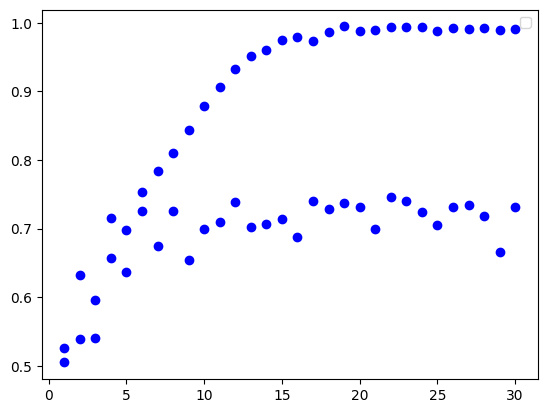

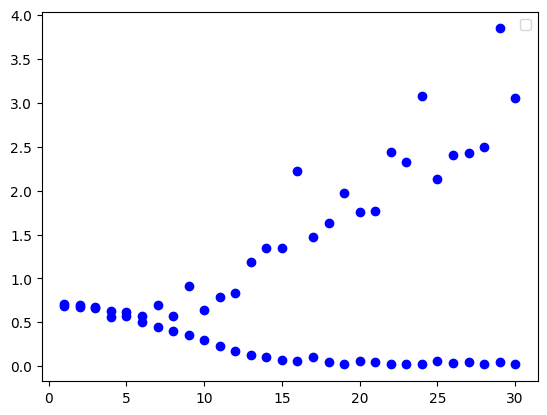

In [34]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo')
plt.plot(epochs,val_acc,'bo')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo')
plt.plot(epochs,val_loss,'bo')
plt.legend()

plt.show()

In [35]:
datagen=idg(rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest'
                          )

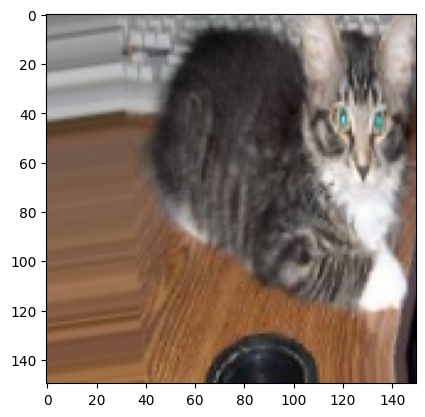

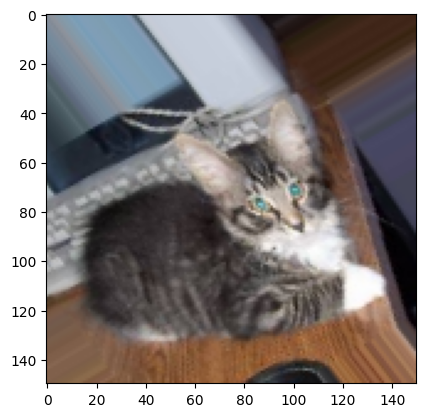

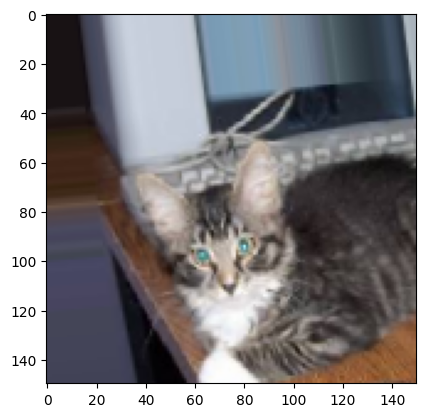

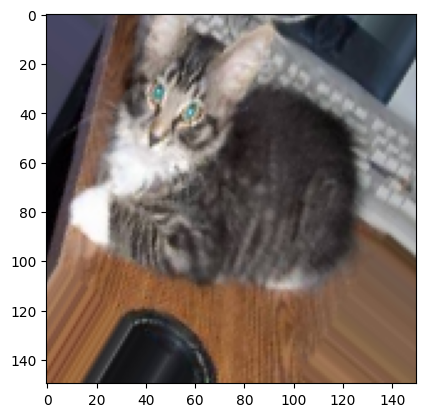

In [36]:
from keras.preprocessing import image
fnames=[os.path.join(tcd,fname) for fname in os.listdir(tcd)]
img_path=fnames[0]
img=image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)
x=x.reshape((1,)+ x.shape)
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4==0:
        break
plt.show()

In [51]:
model2=models.Sequential()
model2.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64,(3,3),activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128,(3,3),activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128,(3,3),activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512,activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))

In [52]:
model2.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [60]:
td=idg(rescale=1./255,
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,fill_mode='nearest'
                          )
ted=idg(rescale=1./255)

In [73]:
train_g=td.flow_from_directory(tdir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_g=ted.flow_from_directory(vdir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [77]:
history2=model2.fit(train_g,steps_per_epoch=100,epochs=30,validation_data=validation_g,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 13s 127ms/step - loss: 0.6777 - acc: 0.5855 - val_loss: 0.6508 - val_acc: 0.6550
Epoch 2/30
100/100 [==============================] - 13s 128ms/step - loss: 0.6574 - acc: 0.6210 - val_loss: 0.7127 - val_acc: 0.5930
Epoch 3/30
100/100 [==============================] - 13s 130ms/step - loss: 0.6634 - acc: 0.6275 - val_loss: 0.6317 - val_acc: 0.6670
Epoch 4/30
100/100 [==============================] - 13s 128ms/step - loss: 0.6601 - acc: 0.6550 - val_loss: 0.6079 - val_acc: 0.6720
Epoch 5/30
100/100 [==============================] - 13s 129ms/step - loss: 0.6169 - acc: 0.6630 - val_loss: 0.6033 - val_acc: 0.6640
Epoch 6/30
100/100 [==============================] - 13s 127ms/step - loss: 0.6216 - acc: 0.6535 - val_loss: 0.6124 - val_acc: 0.6790
Epoch 7/30
100/100 [==============================] - 13s 128ms/step - loss: 0.6212 - acc: 0.6515 - val_loss: 0.6553 - val_acc: 0.6470
Epoch 8/30
100/100 [==============================] - 1

In [78]:
model2.save('second')

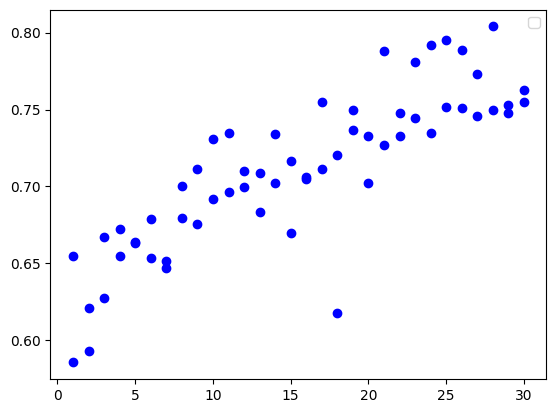

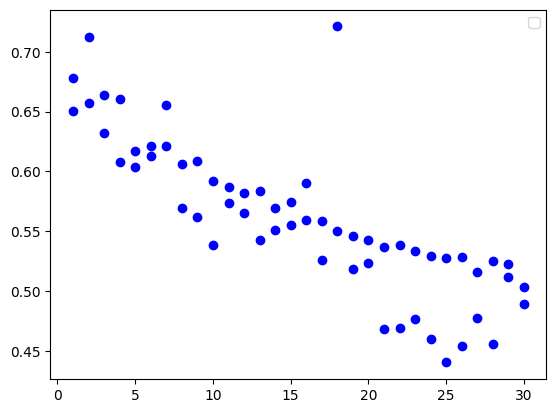

In [82]:
import matplotlib.pyplot as plt
acc=history2.history['acc']
val_acc=history2.history['val_acc']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo')
plt.plot(epochs,val_acc,'bo')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo')
plt.plot(epochs,val_loss,'bo')
plt.legend()

plt.show()